## 1. Quickstart

<div style="text-align: right"> Initial issue : 2025.11.05 </div>
<div style="text-align: right"> last update : 2025.11.05 </div>

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

### 모델 이름 지정

**기본 형식**
단순히 모델 이름만 지정:
* `'o3-mini'`
* `'claude-sonnet-4-5'`

**통합 형식**
모델 제공자와 모델을 함께 지정할 수 있습니다:

```
'{model_provider}:{model}'
```

**예시:**
* `'openai:o1'`
* `'anthropic:claude-sonnet-4-5'`

**주요 파라미터**
* **temperature**: 출력의 무작위성을 조절하는 모델 온도 값
* **max_tokens**: 생성할 최대 토큰 수
* **timeout**: 응답 대기 최대 시간 (초 단위)
* **max_retries**: 요청 실패 시 최대 재시도 횟수
* **base_url**: 커스텀 API endpoint URL
* **rate_limiter**: 요청 속도를 제어하는 BaseRateLimiter 인스턴스

### 사용 예시

```python
model_kwargs = {
    "temperature": 0.7,
    "max_tokens": 1000,
    "timeout": 30
}
```

> **참고**: 사용 가능한 전체 파라미터 목록은 각 모델 제공자의 integration reference를 참조하세요.

- [공식문서](https://reference.langchain.com/python/langchain/models/?_gl=1*kundig*_gcl_au*MjAwMTM0Mzc1Mi4xNzYxNDEwNDky*_ga*MTI0ODcwNDIuMTc2MTgwNjA5Mg..*_ga_47WX3HKKY2*czE3NjE4MDYwNzUkbzUkZzEkdDE3NjE4MDYxMjEkajE0JGwwJGgw#langchain.chat_models.init_chat_model)

In [2]:
from langchain.chat_models import init_chat_model
from langchain_teddynote.messages import stream_response

In [3]:
llm = init_chat_model("openai:gpt-4.1", temperature=0)

In [4]:
result = llm.stream("외국인 친구에게 추천할 서울 관광지 5군데를 알려줘.")
# 스트리밍 출력
stream_response(result)

물론이죠! 외국인 친구에게 추천할 만한 서울의 대표적인 관광지 5곳을 소개해드릴게요.

1. **경복궁(Gyeongbokgung Palace)**
   - 조선시대의 대표 궁궐로, 한국의 전통 건축과 역사를 느낄 수 있는 곳입니다. 한복을 입고 방문하면 특별한 추억을 만들 수 있어요.

2. **북촌 한옥마을(Bukchon Hanok Village)**
   - 전통 한옥이 모여 있는 마을로, 골목골목을 산책하며 한국의 옛 정취를 느낄 수 있습니다. 사진 찍기 좋은 명소이기도 해요.

3. **남산타워(Namsan Seoul Tower, N Seoul Tower)**
   - 서울의 전경을 한눈에 볼 수 있는 전망대입니다. 케이블카를 타고 올라가거나, 사랑의 자물쇠로 유명한

RemoteProtocolError: peer closed connection without sending complete message body (incomplete chunked read)

### 에이전트 생성
과거에는 `create_react_agent`를 사용했는데 이제는 `create_agent`로 통합되었습니다.

In [ ]:
from langchain.agents import create_agent
from langchain_teddynote.graphs import visualize_graph

In [ ]:
agent = create_agent("openai:gpt-4.1-mini", tools=[])

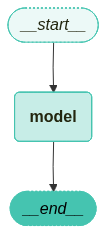

In [ ]:
visualize_graph(agent)

메시지 출력

In [ ]:
from langchain_teddynote.messages import stream_graph
from langchain_core.messages import HumanMessage

In [ ]:
stream_graph(agent, inputs={"messages": [HumanMessage(content="외국인 친구에게 추천할만한 부산 관광지 5곳을 알려줘.")]})


🔄 Node: model 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
외국인 친구에게 추천할 만한 부산 관광지 5곳을 소개할게요!

1. **해운대 해수욕장**  
부산에서 가장 유명한 해변으로, 깨끗한 바다와 넓은 백사장이 인상적이에요. 근처에 다양한 카페와 레스토랑도 많아 편리합니다.

2. **감천문화마을**  
알록달록한 집들이 언덕에 모여 있는 독특한 마을이에요. 예술 작품과 벽화가 많아 사진 찍기 좋고, 부산의 옛 모습도 느낄 수 있습니다.

3. **광안리 해수욕장 & 광안대교**  
밤에 광안대교의 화려한 조명이 켜지는 모습이 아름다워요. 해변 산책이나 근처 카페에서 바다를 감상하기 좋습니다.

4. **자갈치시장**  
부산 최대의 수산시장으로 신선한 해산물을 맛보고 구경할 수 있어요. 외국인들도 한국의 활기찬 재래시장을 경험하기에 딱 좋습니다.

5. **부산 타워 (용두산 공원)**  
부산 시내가 한눈에 내려다보이는 전망대가 있어요. 용두산 공원 자체도 산책하기 좋고, 야경이 멋집니다.

이 다섯 곳만 가도 부산의 대표적인 매력을 충분히 즐길 수 있을 거예요!

### 기본 에이전트 만들기
질문에 답하고 도구를 호출하는 간단한 에이전트. 가상의 날씨함수(도구)를 사용하며, 간단한 프롬프트로 동작 안내

In [ ]:
from langchain.tools import tool
from langchain.agents import create_agent


In [ ]:
@tool
def get_weather(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}"


agent = create_agent(
    model="openai:gpt-4.1-mini",
    tools=[get_weather],
    system_prompt="You are a helpful assistant"
)

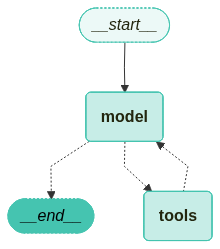

In [ ]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(agent)

답변 출력

In [ ]:
# 에이전트 실행
stream_graph(agent, inputs={"messages": [HumanMessage(content="서울 날씨가 어때?")]})


🔄 Node: model 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
It's always sunny in 서울
🔄 Node: model 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
서울은 오늘 맑은 날씨예요. 더 궁금한 점 있으신가요?

### 도구(Tool)
도구를 사용하면 모델이 정의한 함수를 호출하여 상호작용 가능.  
도구는 런타임 컨텍스트에 의존할 수 있으며, 메모리와 상호작욜 할수도 있음

**컨텍스트(Context)**   
- 컨텍스트는 도구에 전달되는 추가 정보를 제공  
- runtime.context를 통해 컨텍스트에 접근할 수 있습니다.
- runtime.context.user_id

In [ ]:
from dataclasses import dataclass
from langchain_openai import ChatOpenAI
from langchain.agents import create_agent
from langchain.tools import tool, ToolRuntime

In [ ]:
USER_DATABASE = {
    "teddy": {
        "name": "Teddy Lee",
        "account_type": "Premium",
        "balance": 5000,
        "email": "teddy@example.com",
    },
    "shirley": {
        "name": "Shirley Kim",
        "account_type": "Standard",
        "balance": 1200,
        "email": "shirley@example.com",
    },
}


@dataclass
class UserContext:
    user_id: str

In [ ]:
@tool
def get_account_info(runtime: ToolRuntime[UserContext]) -> str:
    """Get the current user's account information."""
    user_id = runtime.context.user_id

    if user_id in USER_DATABASE:
        user = USER_DATABASE[user_id]
        return f"Account holder: {user['name']}\nType: {user['account_type']}\nBalance: ${user['balance']}"
    return "User not found"

In [ ]:
model = ChatOpenAI(model="gpt-4o")
agent = create_agent(
    model,
    tools=[get_account_info],
    context_schema=UserContext,
    system_prompt="You are a financial assistant.",
)

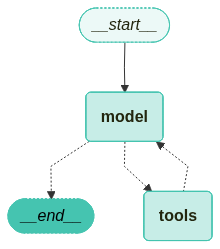

In [ ]:
visualize_graph(agent)

답변

In [ ]:
from langchain_teddynote.messages import stream_graph
from langchain_core.messages import HumanMessage

In [ ]:
stream_graph(
    agent,
    inputs={"messages": [HumanMessage(content="내 계좌의 현재 잔고를 알려주세요.")]},
    context=UserContext(user_id="teddy"),
)


🔄 Node: model 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Account holder: Teddy Lee
Type: Premium
Balance: $5000
🔄 Node: model 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
현재 계좌의 잔고는 $5000입니다.

### 응답 형식(Response Format)
- 에이전트 응답이 특정 스키마와 일치하도록 구조화된 응답 형식을 정의
- dataclass 또는 pydantic 모델 사용하여 정의 가능

In [ ]:
from pydantic import BaseModel, Field


class ResponseFormat(BaseModel):
    """Response schema for the agent."""

    email_sender: str = Field(description="The sender of the email")
    email_sender_address: str = Field(description="The address of the sender")

In [ ]:
agent = create_agent(
    model=llm,
    system_prompt="Extract useful information from the email.",
    tools=[],
    response_format=ResponseFormat,
)

In [ ]:
sample_input = """From: 김철수 (chulsoo.kim@bikecorporation.me)
Subject: "ZENESIS" 자전거 유통 협력 및 미팅 일정 제안

안녕하세요, 이은채 대리님,

저는 바이크코퍼레이션의 김철수 상무입니다. 최근 보도자료를 통해 귀사의 신규 자전거 "ZENESIS"에 대해 알게 되었습니다. 바이크코퍼레이션은 자전거 제조 및 유통 분야에서 혁신과 품질을 선도하는 기업으로, 이 분야에서의 장기적인 경험과 전문성을 가지고 있습니다.

ZENESIS 모델에 대한 상세한 브로슈어를 요청드립니다. 특히 기술 사양, 배터리 성능, 그리고 디자인 측면에 대한 정보가 필요합니다. 이를 통해 저희가 제안할 유통 전략과 마케팅 계획을 보다 구체화할 수 있을 것입니다.

또한, 협력 가능성을 더 깊이 논의하기 위해 다음 주 화요일(1월 15일) 오전 10시에 미팅을 제안합니다. 귀사 사무실에서 만나 이야기를 나눌 수 있을까요?

감사합니다.

김철수
상무이사
바이크코퍼레이션
"""

# 첫 번째 질문: 날씨 문의
response = agent.invoke(
    {"messages": [HumanMessage(content=sample_input)]},
)
print(response["messages"][-1].content)
print("===" * 10)
print(response["structured_response"])

{"email_sender":"김철수","email_sender_address":"chulsoo.kim@bikecorporation.me"}
email_sender='김철수' email_sender_address='chulsoo.kim@bikecorporation.me'


### 단기 메모리 추가  
- 에이전트에 메모리를 추가하여 상호작용 간에 상태를 유지합니다. 이를 통해 에이전트는 이전 대화와 컨텍스트를 기억할 수 있음

- 단기 기억의 유지의 범위는 `thread_id` 로 관리 합니다. 즉, 동일한 `thread_id` 는 동일한 메모리를 공유

- 참고: 프로덕션 환경에서는 데이터베이스에 저장하는 영구 체크포인터를 사용하세요.

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver

# 메모리 체크포인터 생성
checkpointer = InMemorySaver()

In [ ]:
# 모든 구성요소를 포함한 에이전트 생성
agent = create_agent(
    model=llm,
    checkpointer=checkpointer,
)

# thread_id는 특정 대화의 고유 식별자입니다.
config = {"configurable": {"thread_id": "1"}}

In [ ]:
stream_graph(
    agent,
    inputs={"messages": [HumanMessage(content="안녕, 내 이름은 홍길동이야")]},
    config=config,
)


🔄 Node: model 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요, 홍길동님! 만나서 반가워요. 오늘은 어떤 도움을 드릴까요? 😊

In [ ]:
stream_graph(
    agent,
    inputs={"messages": [HumanMessage(content="내 이름이 뭔지 기억나?")]},
    config=config,
)


🔄 Node: model 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
네, 홍길동님! 아까 본인 이름이 홍길동이라고 말씀해주셨어요. 😊  
혹시 또 궁금한 점이나 도움이 필요한 게 있으신가요?

### 미들웨어(Middleware)